# Testing the Head

**Warning:** Before running this notebook, first make sure you understand the command you run and make sure that the robot can freely move.

**Note:** Also stop all other running Python script or notebook connected to the robot as only one connection can run at the same time.

In [1]:
%matplotlib notebook

import time
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

## Connect to the head

In [2]:
from reachy import Reachy, parts

In [3]:
reachy = Reachy(
    head=parts.Head(io='/dev/ttyUSB*'),
)

## Move the neck

Check that all 3 disks are present and ok.

In [4]:
for d in reachy.head.neck.disks:
    print(d, d.temperature)

<ControlledMotor alias="disk_bottom" id=4> 29.188
<ControlledMotor alias="disk_middle" id=3> 28.812
<ControlledMotor alias="disk_top" id=2> 28.562
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Make sure the head ends up in a forward looking position.

In [5]:
reachy.head.homing()

Turn compliant/stiff and check that the head is free or fixed.

In [6]:
reachy.head.compliant = True

In [7]:
reachy.head.compliant = False

Go back to the base position.

In [8]:
reachy.head.compliant = False
reachy.head.look_at(1, 0, 0, duration=1, wait=True)

Play some random moves.

<IPython.core.display.Javascript object>


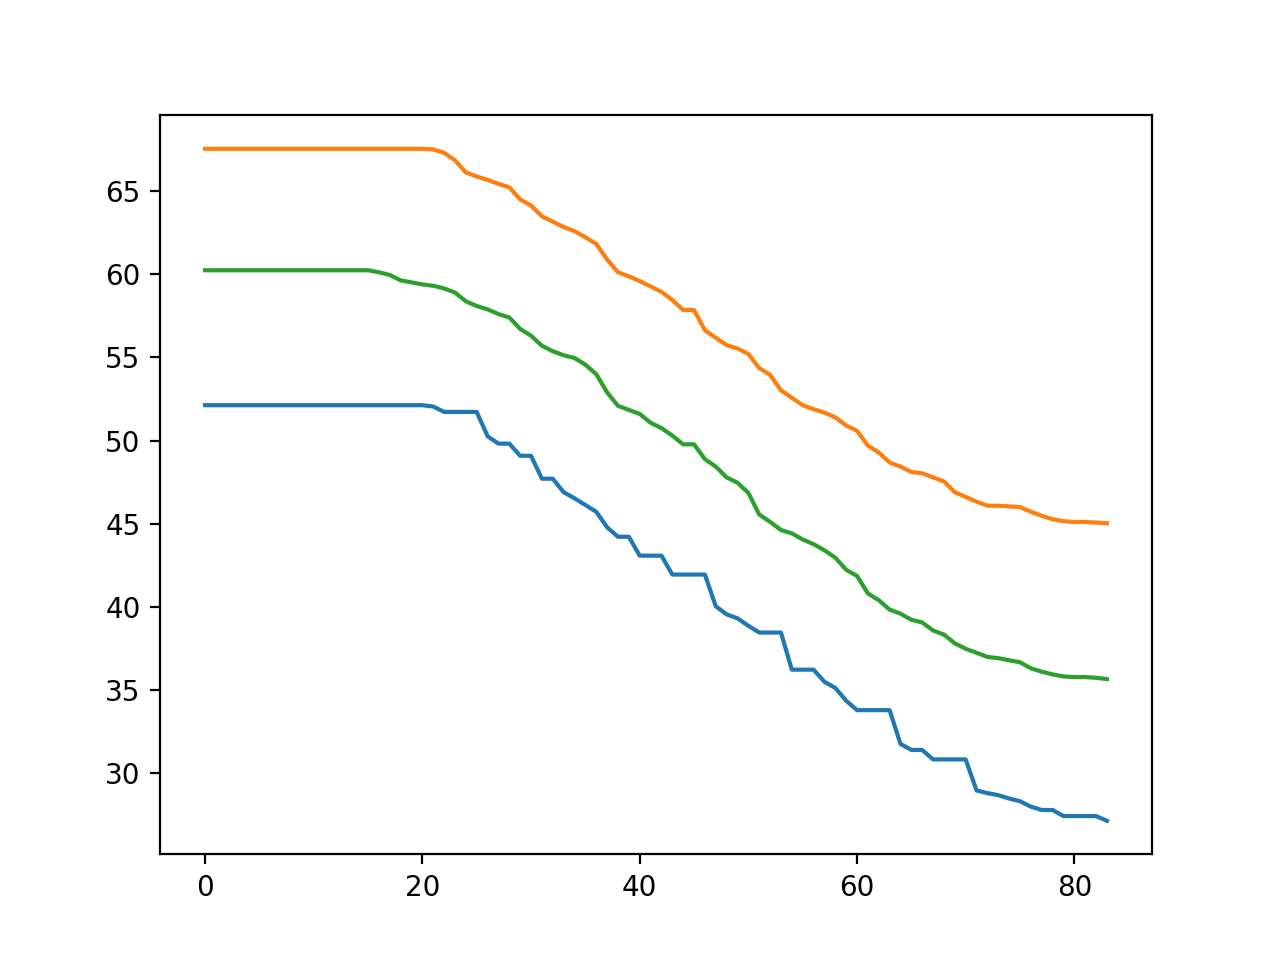

In [9]:
x = 0.5
y = (2 * np.random.rand() - 1) * 0.25
z = (2 * np.random.rand() - 1) * 0.25

duration = 1

reachy.head.look_at(x, y, z, duration=duration, wait=False)

real = []

t0 = time.time()
while time.time() - t0 < duration:
    real.append([d.rot_position for d in reachy.head.neck.disks])
    time.sleep(0.01)
    
plt.figure()
plt.plot(real)

## Move the antennas

Check that we have both antennas.

In [10]:
reachy.head.motors

[<DxlMotor "head.left_antenna" pos="-0.44" mode="stiff">,
 <DxlMotor "head.right_antenna" pos="-0.44" mode="stiff">]

Turn them stiff.

In [11]:
for m in reachy.head.motors:
    m.compliant = False

Make them go to 0

In [12]:
for m in reachy.head.motors:
    m.goal_position = 0

Make them go to 45

In [13]:
for m in reachy.head.motors:
    m.goal_position = 45

(check that they both moved)

Make them go to 0 again

In [14]:
for m in reachy.head.motors:
    m.goal_position = 0

Make them follow a sinus for a few seconds.

In [15]:
t = np.linspace(0, 10, 1000)
pos = 30 * np.sin(2 * np.pi * 0.5 * t)

for p in pos:
    for m in reachy.head.motors:
        m.goal_position = p
    time.sleep(0.01)

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pierrerouanet/Dev/third-party/pyluos/pyluos/io/serial_io.py", line 89, in _poll
    to_read = self._serial.in_waiting
  File "/Users/pierrerouanet/.virtualenvs/reachy/lib/python3.7/site-packages/serial/serialposix.py", line 467, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
OSError: [Errno 6] Device not configured



## Access the camera

Check the default camera (right one).

In [ ]:
plt.figure()
plt.imshow(cv.cvtColor(reachy.head.get_image(), cv.COLOR_BGR2RGB))

Switch camera (use the left one).

In [ ]:
reachy.head.enable_camera('left')

In [ ]:
plt.figure()
plt.imshow(cv.cvtColor(reachy.head.get_image(), cv.COLOR_BGR2RGB))